**link colab : https://colab.research.google.com/drive/12k_6K2CXIntKPw7Lq1nFeLWix2-Q2eDW?usp=sharing**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##read data

In [25]:
df = pd.read_csv('/content/breast-cancer.csv')
df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events


In [26]:
df.shape

(286, 10)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    int64 
 6   breast       286 non-null    object
 7   breast-quad  285 non-null    object
 8   irradiat     286 non-null    object
 9   Class        286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


##pre-processing

In [28]:
df.drop_duplicates(inplace = True)

In [29]:
df.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
Class          0
dtype: int64

In [30]:
df = df.dropna()

In [31]:

df.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
Class          0
dtype: int64

In [32]:
df.shape

(263, 10)

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
deg-malig,263.0,2.068441,0.72777,1.0,2.0,2.0,3.0,3.0


In [34]:
df = df[df.age != '20-29']

In [35]:
for i in df.columns:
    df[i] = df[i].astype('category')
    print(df[i].value_counts())
    print('='*50)

40-49    86
50-59    86
60-69    51
30-39    34
70-79     5
Name: age, dtype: int64
premeno    141
ge40       116
lt40         5
Name: menopause, dtype: int64
30-34    57
25-29    48
20-24    45
10-14    26
15-19    25
40-44    21
35-39    17
0-4       8
50-54     8
5-9       4
45-49     3
Name: tumor-size, dtype: int64
0-2      195
3-5       34
6-8       16
9-11       7
15-17      6
12-14      3
24-26      1
Name: inv-nodes, dtype: int64
no     207
yes     55
Name: node-caps, dtype: int64
2    122
3     79
1     61
Name: deg-malig, dtype: int64
left     136
right    126
Name: breast, dtype: int64
left_low     99
left_up      89
right_up     31
right_low    23
central      20
Name: breast-quad, dtype: int64
no     201
yes     61
Name: irradiat, dtype: int64
no-recurrence-events    185
recurrence-events        77
Name: Class, dtype: int64


In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    df = df.apply(le.fit_transform)

In [37]:
for i in df.columns:
    print(df[i].value_counts())
    print('='*50)

1    86
2    86
3    51
0    34
4     5
Name: age, dtype: int64
2    141
0    116
1      5
Name: menopause, dtype: int64
5     57
4     48
3     45
1     26
2     25
7     21
6     17
0      8
10     8
9      4
8      3
Name: tumor-size, dtype: int64
0    195
4     34
5     16
6      7
2      6
1      3
3      1
Name: inv-nodes, dtype: int64
0    207
1     55
Name: node-caps, dtype: int64
1    122
2     79
0     61
Name: deg-malig, dtype: int64
0    136
1    126
Name: breast, dtype: int64
1    99
2    89
4    31
3    23
0    20
Name: breast-quad, dtype: int64
0    201
1     61
Name: irradiat, dtype: int64
0    185
1     77
Name: Class, dtype: int64


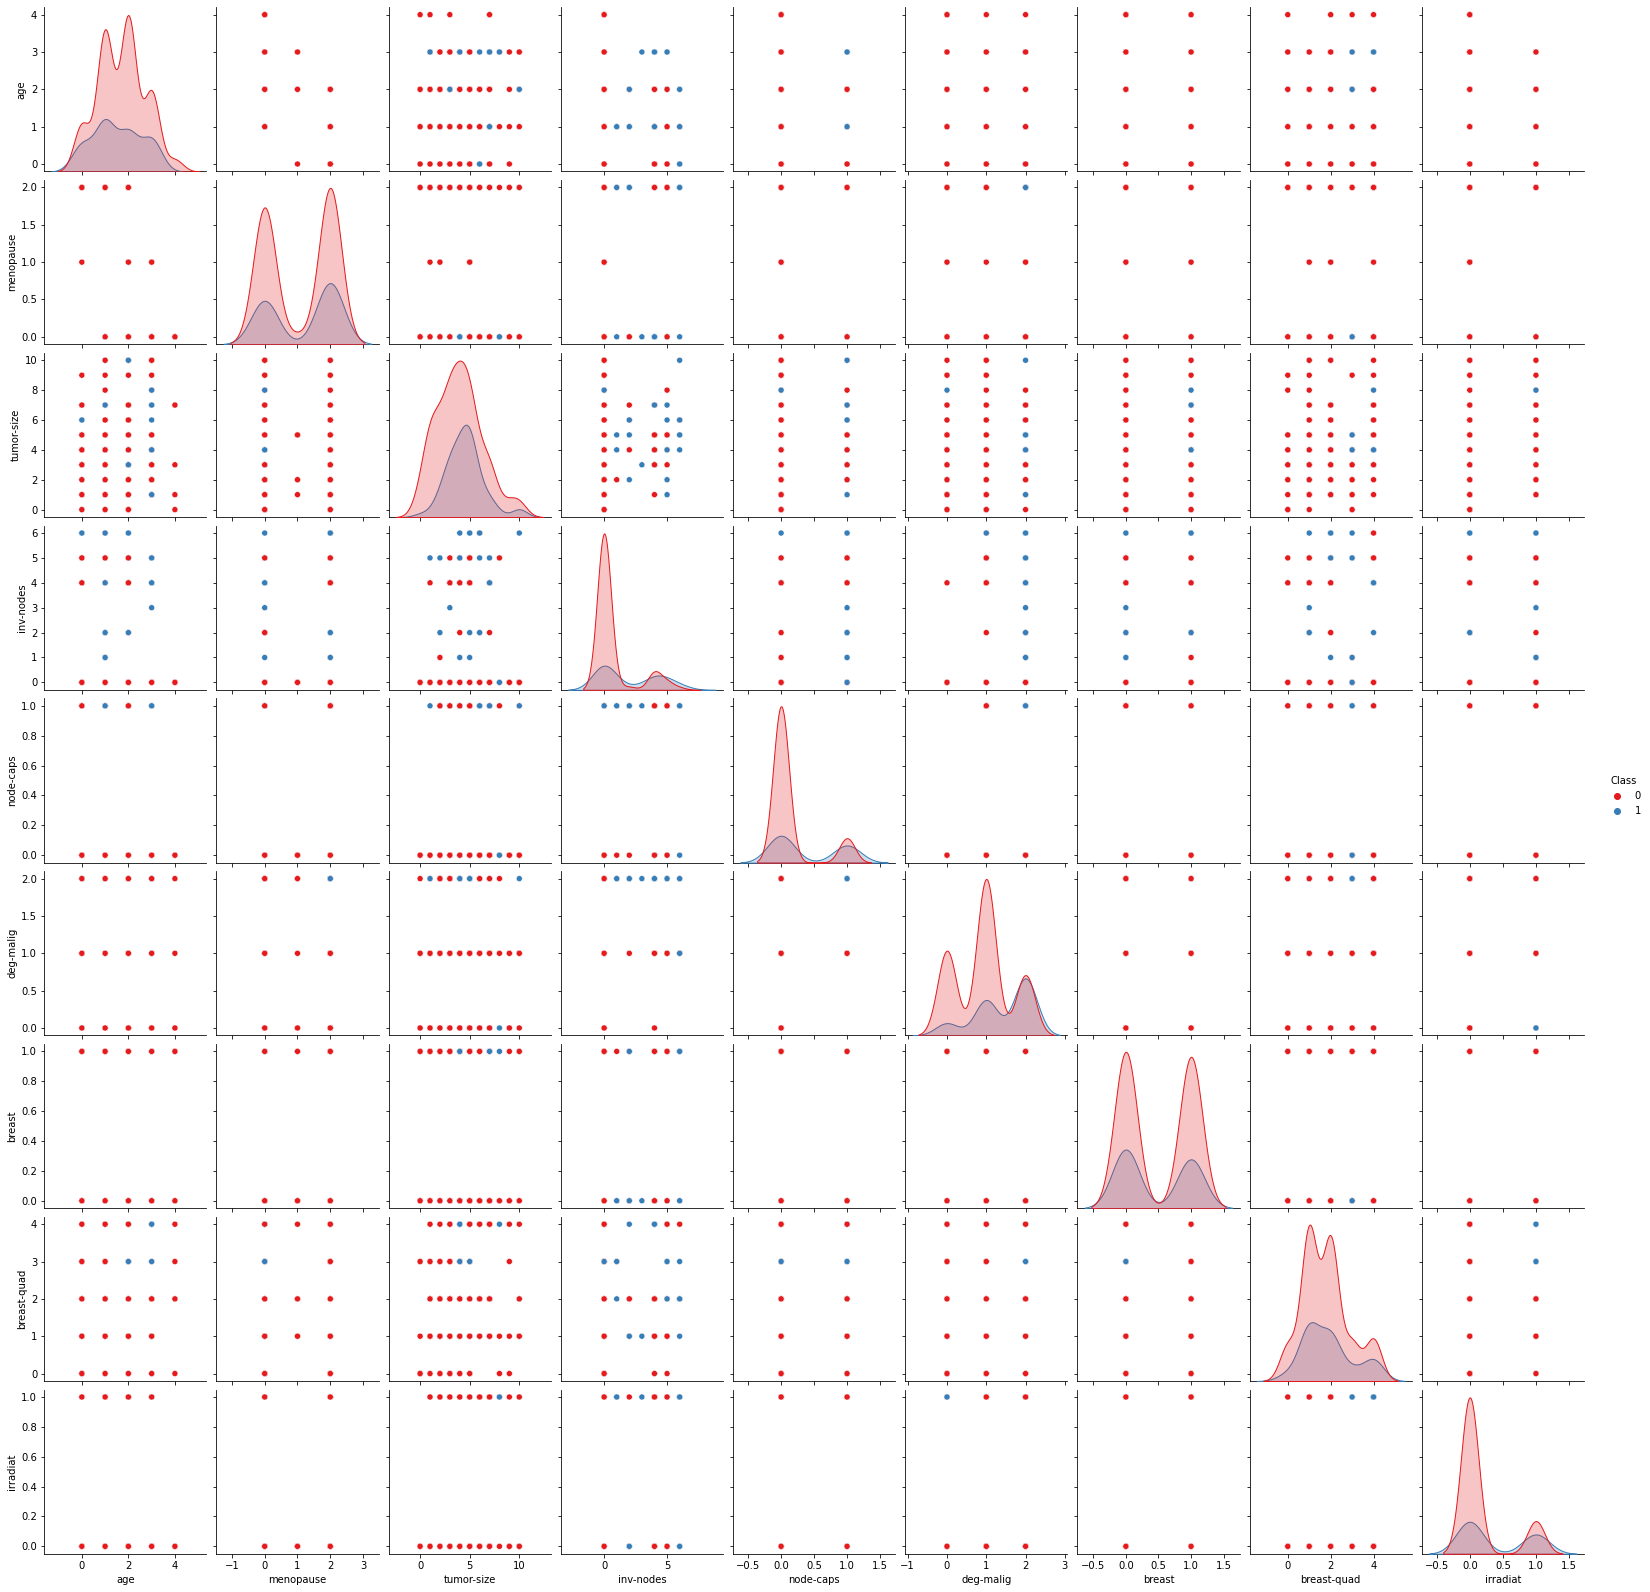

In [16]:
sns.pairplot(df,hue='Class',palette='Set1')

##delete outlier

In [17]:
df = df[df["tumor-size"] < 7]

In [18]:
df = df[df["inv-nodes"] <= 3]

In [19]:
df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,1,2,2,0,1,2,1,2,0,1
1,2,0,2,0,0,0,1,0,0,0
2,2,0,6,0,0,1,0,1,0,1
3,1,2,6,0,1,2,1,1,1,0
7,1,2,1,0,0,1,0,2,0,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 0 to 284
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          177 non-null    int64
 1   menopause    177 non-null    int64
 2   tumor-size   177 non-null    int64
 3   inv-nodes    177 non-null    int64
 4   node-caps    177 non-null    int64
 5   deg-malig    177 non-null    int64
 6   breast       177 non-null    int64
 7   breast-quad  177 non-null    int64
 8   irradiat     177 non-null    int64
 9   Class        177 non-null    int64
dtypes: int64(10)
memory usage: 15.2 KB


##train test split

In [38]:
x = df.drop(['Class'], axis = 1).values
y = df['Class'].values
x[0:5]

array([[1, 2, 2, 0, 1, 2, 1, 2, 0],
       [2, 0, 2, 0, 0, 0, 1, 0, 0],
       [2, 0, 6, 0, 0, 1, 0, 1, 0],
       [1, 2, 6, 0, 1, 2, 1, 1, 1],
       [1, 2, 5, 4, 1, 1, 0, 4, 0]])

In [39]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.3, random_state=3)

##find best paramter

In [40]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear','poly']
        }
    },  

    'decision_trees': {
        'model': DecisionTreeClassifier(),
        'params' : {
            'criterion': ['gini','entropy'],
            'splitter' : ['best','random'] 

            
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,30,40,100]
        }
    },
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors': [2,3,4,5,6,7,8,9],
        }    
}
}

In [41]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_trainset, y_trainset)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
dfpred = pd.DataFrame(scores,columns=['model','best_score','best_params'])
dfpred

,model,best_score,best_params
0,svm,0.748348,"{'C': 1, 'kernel': 'rbf'}"
1,decision_trees,0.661411,"{'criterion': 'gini', 'splitter': 'best'}"
2,random_forest,0.731682,{'n_estimators': 10}
3,KNeighborsClassifier,0.748048,{'n_neighbors': 7}


##svm

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm = SVC(C= 1, kernel ='linear')
svm.fit(X_trainset,y_trainset)
predictions = svm.predict(X_testset)
svm_acc = accuracy_score(y_testset, predictions)
print("Accuracy svm : ",svm_acc)

Accuracy svm :  0.7721518987341772


##knn

In [43]:
knn = KNeighborsClassifier(8)
knn.fit(X_trainset , y_trainset)
pred = knn.predict(X_testset)
knn_acc = accuracy_score(y_testset, pred)
print("Accuracy knn : ",knn_acc)

Accuracy knn :  0.759493670886076


##DecisionTree Gini

In [44]:
from sklearn.tree import DecisionTreeClassifier
breastTree = DecisionTreeClassifier()
breastTree

DecisionTreeClassifier()

In [45]:
breastTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier()

In [46]:
predTree = breastTree.predict(X_testset)

In [47]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.569620253164557


In [48]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_testset,predTree))

              precision    recall  f1-score   support

           0       0.78      0.63      0.70        62
           1       0.21      0.35      0.26        17

    accuracy                           0.57        79
   macro avg       0.49      0.49      0.48        79
weighted avg       0.66      0.57      0.60        79



In [49]:
from IPython.display import Image  
#from sklearn.externals.six import StringIO  
from six import StringIO

from sklearn.tree import export_graphviz
import pydot 

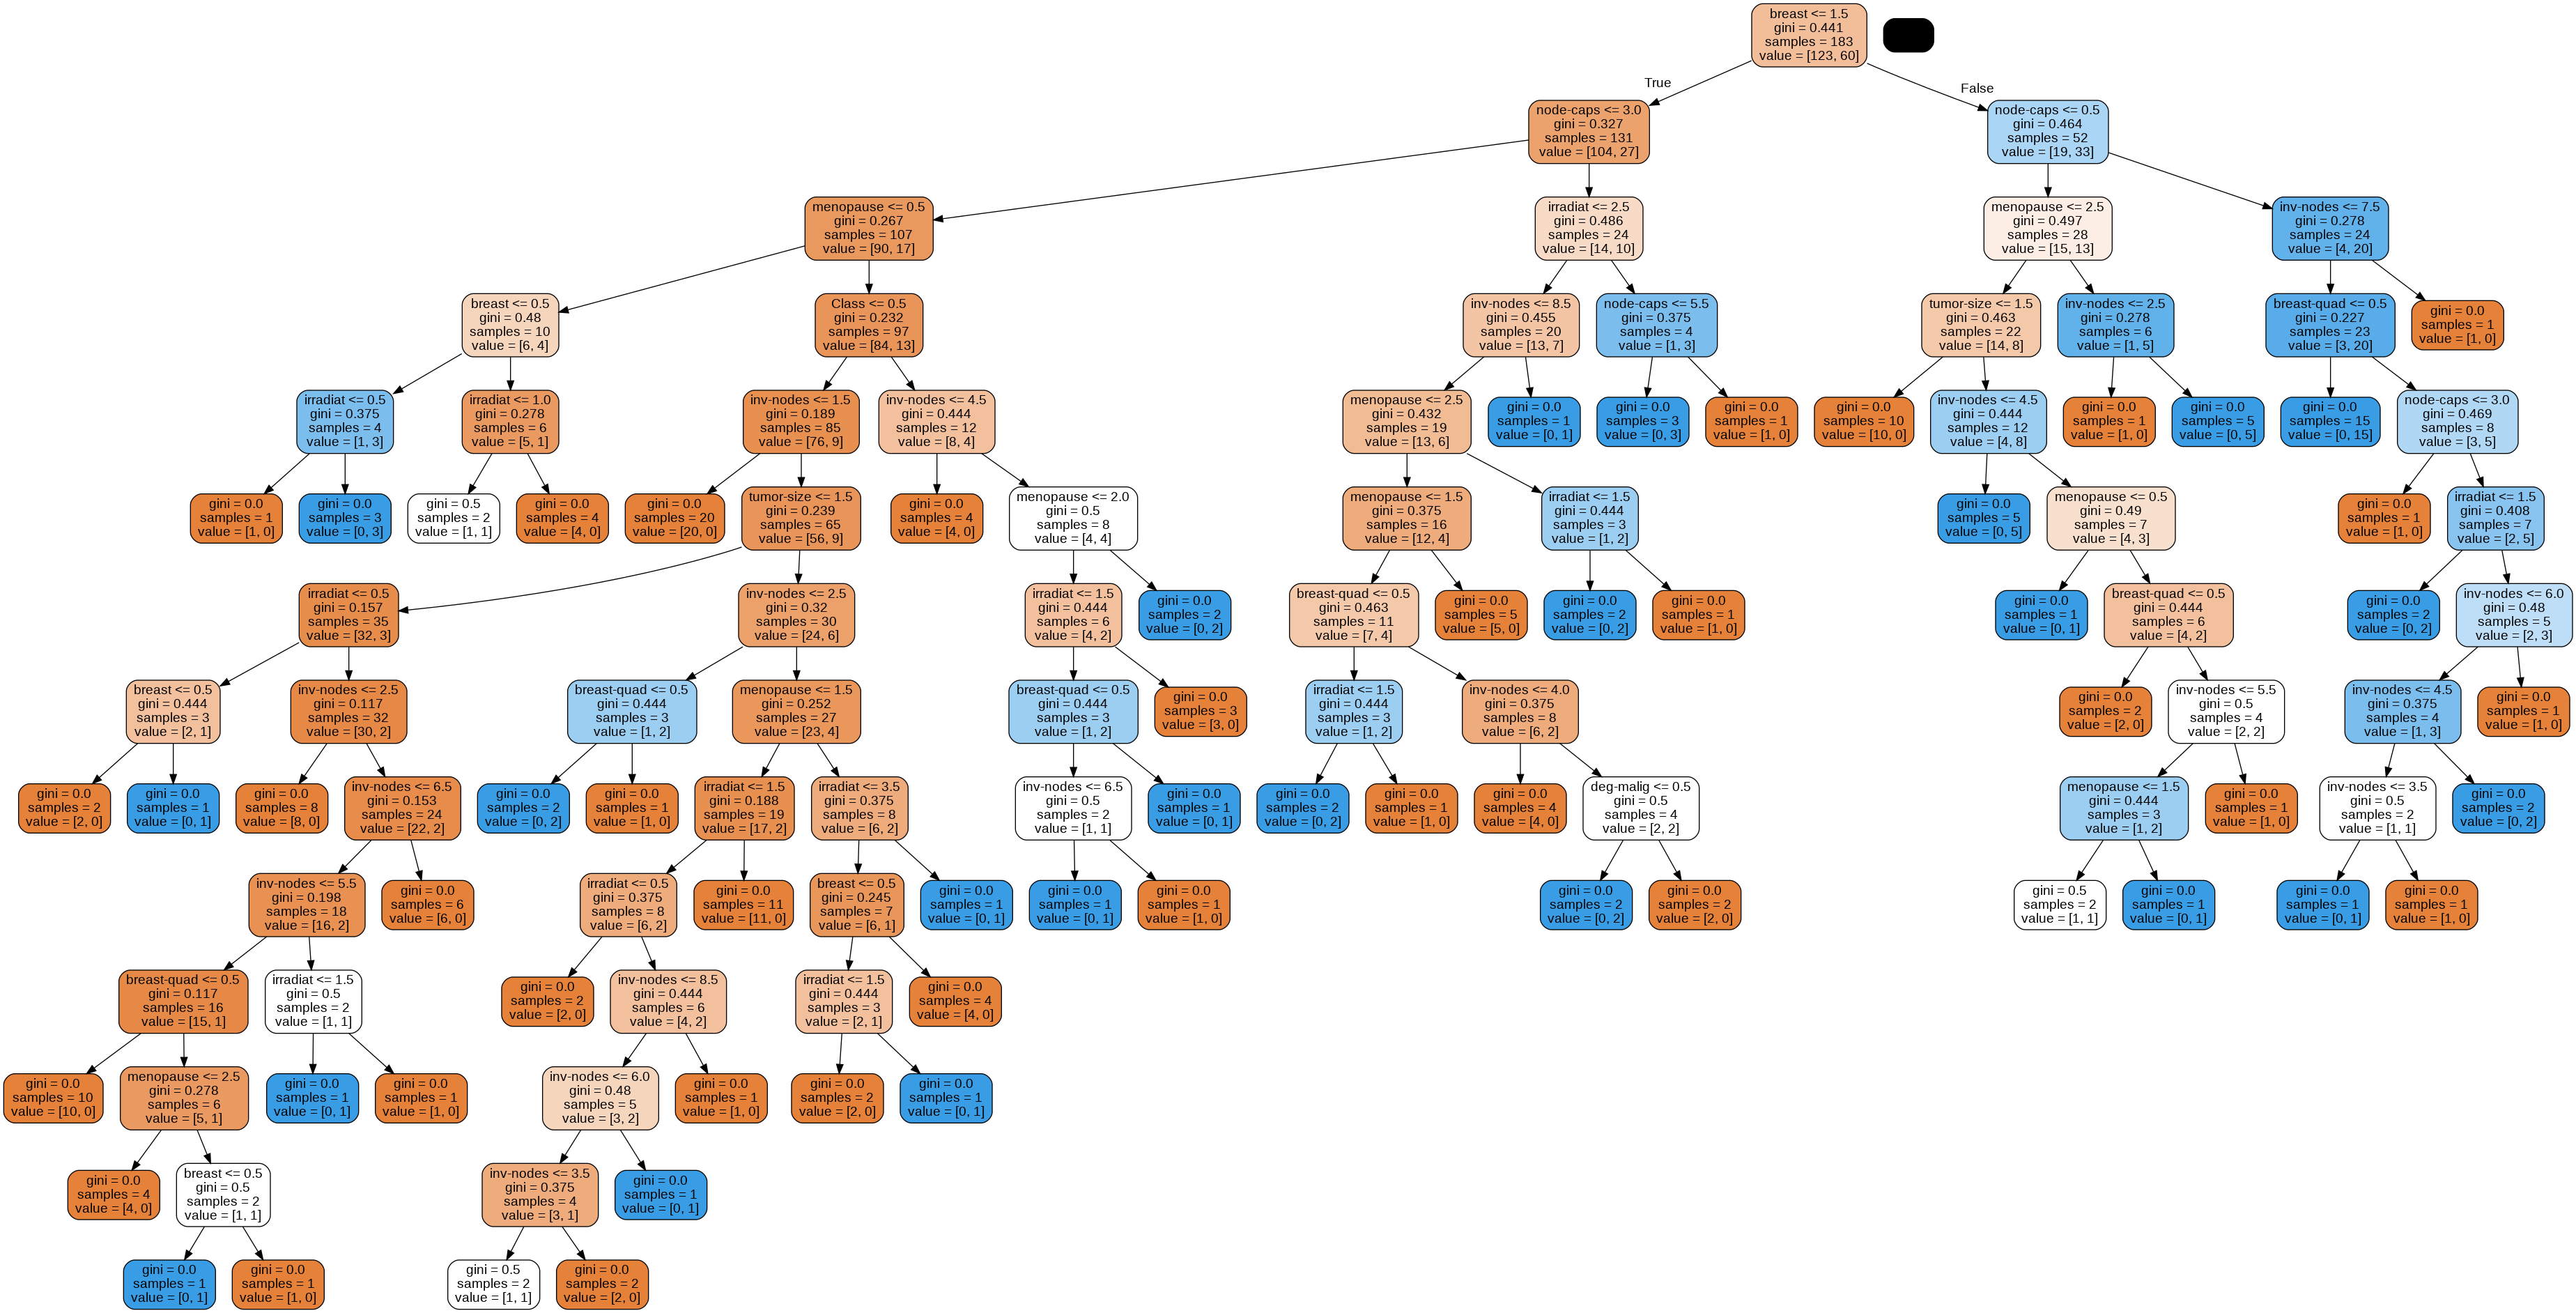

In [50]:
dot_data = StringIO()  
features = list(df.columns[1:])
export_graphviz(breastTree, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

##DecisionTree entropy

In [51]:
from sklearn.tree import DecisionTreeClassifier
breastTreeEntropy = DecisionTreeClassifier(criterion  = 'entropy', splitter = 'random')
breastTreeEntropy

DecisionTreeClassifier(criterion='entropy', splitter='random')

In [52]:
breastTreeEntropy.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', splitter='random')

In [53]:
predTreeEntropy = breastTreeEntropy.predict(X_testset)

In [54]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTreeEntropy))

DecisionTrees's Accuracy:  0.5316455696202531


In [55]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_testset,predTreeEntropy))

              precision    recall  f1-score   support

           0       0.79      0.55      0.65        62
           1       0.22      0.47      0.30        17

    accuracy                           0.53        79
   macro avg       0.51      0.51      0.47        79
weighted avg       0.67      0.53      0.57        79



##RandomForest

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=30)
rfc.fit(X_trainset, y_trainset)

RandomForestClassifier(n_estimators=30)

In [57]:
rfc_pred = rfc.predict(X_testset)

In [58]:
print(confusion_matrix(y_testset,rfc_pred))

[[43 19]
 [ 9  8]]


In [59]:
print(classification_report(y_testset,rfc_pred))

              precision    recall  f1-score   support

           0       0.83      0.69      0.75        62
           1       0.30      0.47      0.36        17

    accuracy                           0.65        79
   macro avg       0.56      0.58      0.56        79
weighted avg       0.71      0.65      0.67        79



In [60]:
svm_acc = accuracy_score(y_testset, predictions)
print("Accuracy svm : ",svm_acc)

Accuracy svm :  0.7721518987341772
